In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_prices = pd.read_csv('stock_prices.csv',index_col='date',parse_dates=True)
df_prices = df_prices[df_prices.index > '2023-10-31']
df_prices

,ADN,AEE,AEP,AES,AGR,ALCE,ALE,AMPS,ARIS,ARTNA,...,TVE,UGI,UTL,VGAS,VIA,VST,WEC,WTRG,XEL,YORW
date,,,,,,,,,,,,,,,,,,,,,
2023-11-01,11.280,75.527405,74.758278,14.556235,29.796631,10.610,52.569363,5.07,8.101979,38.747330,...,21.079531,20.227375,45.018688,3.94,5.910,33.622509,80.096458,33.063393,59.395470,35.762764
2023-11-02,13.848,76.785553,77.456146,15.193376,30.943777,10.600,55.036446,5.58,8.916101,40.018215,...,21.040037,21.215965,46.129654,4.00,7.270,34.345894,81.386765,34.045959,59.915451,36.197807
2023-11-03,14.397,77.168892,77.925346,16.457857,31.157652,10.600,54.587883,5.76,9.396727,41.505848,...,21.217756,21.671495,46.650726,4.00,7.270,34.672905,81.444977,35.195560,59.876209,37.433735
2023-11-06,14.403,76.942810,77.465919,16.016758,30.516027,10.630,55.016941,5.47,9.180936,41.594513,...,20.980797,21.225657,46.631065,3.85,6.550,35.009823,80.290489,34.704281,59.415096,37.453510
2023-11-07,14.553,76.667595,77.074928,15.820715,30.185493,10.600,54.110073,5.66,8.641458,41.249699,...,20.941305,21.138428,47.781353,3.99,7.440,34.435074,79.601677,34.429161,58.698898,37.216213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,4.980,74.709999,86.370003,17.201746,37.020000,0.317,59.959999,3.68,14.660000,34.889999,...,21.559969,26.000000,50.799999,4.34,10.900,70.459999,81.822365,36.540001,55.330002,35.529999
2024-04-25,4.914,74.760002,86.860001,16.964069,36.549999,0.330,59.570000,3.60,14.650000,34.520000,...,21.480484,25.730000,50.490002,4.29,10.880,72.480003,82.000603,36.570000,55.009998,35.369999
2024-04-26,4.548,73.660004,85.260002,17.043295,36.380001,0.344,59.020000,3.62,14.810000,34.500000,...,21.401001,25.379999,49.939999,4.60,10.880,72.699997,80.693504,36.090000,53.959999,35.369999


In [3]:
df_train = df_prices[df_prices.index < '2023-12-31']

def pairs_df(df_prices,column1, column2):
    stock_1 = df_prices.columns[column1]
    stock_2 = df_prices.columns[column2]

    df_pairs = df_prices[[stock_1, stock_2]]

    # Convert index to datetime
    df_pairs.index = pd.to_datetime(df_prices.index)


    # model = LinearRegression().fit(np.log(df_train[[stock_1]]), np.log(df_train[[stock_2]]))
    # hedge_ratio = float(model.coef_)
    # df_pairs['spread'] = np.log(df_pairs[stock_1]) - hedge_ratio * np.log(df_pairs[stock_2])
    df_pairs['spread'] = df_pairs[stock_1] - df_pairs[stock_2]
    df_pairs['M'] = df_pairs.index.strftime('%Y-%m')
    return df_pairs

In [4]:
def monthly_df(df_pairs):
    df_monthly = pd.DataFrame()
    # Calculate the monthly mean of the 'spread' column for each month
    df_monthly['mean'] = df_pairs['spread'].resample('M').mean()
    df_monthly['std'] = df_pairs['spread'].resample('M').std()

    df_monthly['rolling_mean'] = df_monthly['mean'].shift(1).rolling(window=2).mean()
    df_monthly['rolling_std'] = df_monthly['std'].shift(1).rolling(window=2).mean()

    df_monthly['M'] = df_monthly.index.strftime('%Y-%m')

    return df_monthly

In [5]:
def calculate_std_mean_df(Std,df_pairs,df_monthly):
    df_calculate_std_mean = pd.merge(df_pairs, df_monthly[['rolling_mean','rolling_std','M']], on='M', how='left')
    df_calculate_std_mean.index = df_pairs.index

    df_calculate_std_mean['up_mean_std'] = df_calculate_std_mean['rolling_mean'] + Std * df_calculate_std_mean['rolling_std']
    df_calculate_std_mean['down_mean_std'] = df_calculate_std_mean['rolling_mean'] - Std * df_calculate_std_mean['rolling_std']

    return df_calculate_std_mean

In [6]:
def signal_df(df_calculate_std_mean):
    df_signal = df_calculate_std_mean.copy()

    spread = np.array(df_signal['spread'])
    mean = np.array(df_signal['rolling_mean'])
    up_mean_std = np.array(df_signal['up_mean_std'])
    down_mean_std = np.array(df_signal['down_mean_std'])

    # Initialize 'Hold' with 0s
    hold = np.zeros(len(spread))  

    # Pre-calculate conditions 
    spread_above_up_mean_std = spread > up_mean_std
    spread_below_down_mean_std = spread < down_mean_std
    mean_crossing_up = (spread < mean) & (np.roll(spread, 1) > mean)
    mean_crossing_down = (spread > mean) & (np.roll(spread, 1) < mean)

    # Iterate through the array
    for i in range(1, len(spread)):
        previous_hold = hold[i - 1]

        if spread_above_up_mean_std[i] and previous_hold == 0:
            hold[i] = 1
        elif spread_below_down_mean_std[i] and previous_hold == 0:
            hold[i] = -1
        elif (mean_crossing_up[i] or mean_crossing_down[i]) and previous_hold != 0:
            hold[i] = 0
        else:
            # Carry forward the 'Hold' value
            hold[i] = previous_hold

    df_signal['Hold'] = hold
    return df_signal

In [7]:
def back_test_df(df_signal,df_prices,column1,column2,initial_cash,cost_rate):

    df_back_test = df_signal.copy()

    stock_1 = df_prices.columns[column1]
    stock_2 = df_prices.columns[column2]

    # Initial data
    n = len(df_back_test['spread'])  
    stock_1_prices = np.array(df_back_test[stock_1])  
    stock_2_prices = np.array(df_back_test[stock_2])  

    hold_signals = np.array(df_back_test['Hold'])

    # Initialize arrays to store calculations
    values = np.zeros((n, 2))
    positions = np.zeros((n, 2))
    price_changes = np.zeros((n, 2))
    profLoss = np.zeros((n, 2))
    commissions = np.zeros((n, 2))
    split = np.zeros((n, 2))
    dividends = np.zeros((n, 2))
    net_income = np.zeros((n, 2))
    total_value = np.zeros(n)


    values[0] = initial_cash, initial_cash  # Set initial values


    for i in range(1, n):
        # Value calculation
        if hold_signals[i-1] == 0 and abs(hold_signals[i]) ==1 :
            values[i] = total_value[i-1]/2
        else:
            values[i] = values[i-1] + net_income[i-1]
        
        
        # Position calculation
        if hold_signals[i-1] == 0 and abs(hold_signals[i]) == 1:
            positions[i, 0] = values[i-1, 0] / stock_1_prices[i] 
            positions[i, 1] = values[i-1, 1] / stock_2_prices[i]
        elif abs(hold_signals[i-1]) == 1 and hold_signals[i] == 0:
            positions[i] = 0, 0
        else:
            positions[i] = positions[i-1]
        
        # Price change calculation
        price_changes[i, 0] = stock_1_prices[i] - stock_1_prices[i-1] if hold_signals[i] in [1] else stock_1_prices[i-1] - stock_1_prices[i]
        price_changes[i, 1] = stock_2_prices[i] - stock_2_prices[i-1] if hold_signals[i] in [-1] else stock_2_prices[i-1] - stock_2_prices[i]
        
        # Profit and loss calculation
        if hold_signals[i-1] == hold_signals[i]:
            profLoss[i] = positions[i] * price_changes[i]
        else:
            profLoss[i] = 0, 0
        
        # Commission calculation
        commissions[i, 0] = abs(positions[i, 0] - positions[i-1, 0]) * cost_rate * stock_1_prices[i]
        commissions[i, 1] = abs(positions[i, 1] - positions[i-1, 1]) * cost_rate * stock_2_prices[i]

        
        # Net income
        net_income[i] = profLoss[i] - commissions[i] + dividends[i]

        total_value[i] = values[i].sum()

    # Compute total value and returns
    returns = np.zeros(n)
    returns[1:] = total_value[1:] / total_value[:-1] - 1

    df_back_test[['value_1','value_2']] = values
    df_back_test[['position_1','position_2']] = positions
    df_back_test[['price_change_1','price_change_2']] = price_changes
    df_back_test[['profLoss_1','profLoss_2']] = profLoss
    df_back_test[['commission_1','commission_2']] = commissions
    df_back_test[['dividend_1','dividend_2']] = dividends
    df_back_test[['net_income_1','net_income_2']] = net_income


    df_back_test['total_value'] = total_value
    df_back_test['return'] = returns

    df_back_test.dropna(inplace=True)

    # df_back_test = df_back_test[[return']]

    df_back_test.rename(columns={"return": f"{stock_1}_{stock_2}"}, inplace=True)
    return df_back_test[f"{stock_1}_{stock_2}"]

In [8]:
# Initial parameters (examples, modify as needed)
Std = 1.5
initial_cash = 10000  # Example initial cash value
cost_rate = 5 / 10000  # Example commission rate

df_final = pd.DataFrame()

for _stock_1 in range(len(df_prices.columns)):
    for _stock_2 in range(_stock_1 + 1, len(df_prices.columns)):

        df_pairs = pairs_df(df_prices,_stock_1,_stock_2)
        df_monthly = monthly_df(df_pairs)
        df_calculate_std_mean = calculate_std_mean_df(Std,df_pairs,df_monthly)
        df_signal = signal_df(df_calculate_std_mean)
        return_back_test = back_test_df(df_signal,df_prices,_stock_1,_stock_2,initial_cash,cost_rate)
        df_final = pd.concat([df_final, return_back_test], axis=1)

# Convert all columns to numeric, forcing errors to NaN
# df_final = df_final.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0, assuming missing values represent no return for that day
df_final.fillna(0, inplace=True)

df_final

,ADN_AEE,ADN_AEP,ADN_AES,ADN_AGR,ADN_ALCE,ADN_ALE,ADN_AMPS,ADN_ARIS,ADN_ARTNA,ADN_ATO,...,VST_WEC,VST_WTRG,VST_XEL,VST_YORW,WEC_WTRG,WEC_XEL,WEC_YORW,WTRG_XEL,WTRG_YORW,XEL_YORW
2024-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03,0.000000,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,-0.000500,...,0.000000,0.000000,0.000000,-0.000500,0.000000,0.000000,-0.000500,-0.000500,-0.000500,-0.000500
2024-01-04,-0.000500,0.035311,0.023503,0.038914,-0.030535,0.038445,0.010567,0.034684,0.021967,0.038771,...,0.000000,0.000000,0.000000,0.009140,0.000000,0.000000,0.009375,-0.000323,0.008885,0.008561
2024-01-05,0.013831,0.011040,0.009592,0.008631,0.017759,0.009092,-0.002581,-0.013492,0.001405,0.009215,...,0.000000,-0.000500,0.000000,0.007905,0.000000,0.000000,0.001077,0.009783,-0.003481,0.006215
2024-01-08,0.007677,0.009989,0.004409,0.011665,0.008033,0.004007,0.002667,0.010185,-0.002287,0.007624,...,0.000000,-0.003298,0.000000,0.007070,0.000000,0.000000,0.006481,-0.005634,0.010327,0.004626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,-0.017503,-0.010930,0.000685,-0.013723,0.000000,-0.013340,-0.003076,0.006203,0.000000,-0.017290,...,0.016510,0.013070,0.014062,0.014915,-0.004873,-0.003242,-0.001874,0.000000,0.003006,0.000000
2024-04-25,0.016633,0.016848,0.017531,0.011258,0.000000,0.011112,0.001090,0.016282,0.000000,0.016789,...,0.015828,0.016270,0.017856,0.018637,0.000422,0.003968,0.004340,0.000000,0.004076,0.000000
2024-04-26,0.007079,0.009375,-0.001841,0.000163,0.000000,0.001681,0.000806,0.003002,0.000000,0.004911,...,0.017827,0.018381,0.019802,0.019641,0.000720,0.004500,0.003312,0.000000,0.002699,0.000000
2024-04-29,0.031012,0.026331,0.032773,0.026420,0.000000,0.024002,-0.027427,0.025060,0.000000,0.033027,...,0.007691,0.006291,0.007800,0.001945,-0.001791,0.001738,-0.007939,0.000000,-0.006449,0.000000


In [9]:
df_final.to_csv('df_final.csv')

In [10]:
def annualized_return(series):
    total_return = (1 + series).prod() - 1
    periods = len(series)
    return (1 + total_return) ** (252 / periods) - 1

def annualized_std_dev(series):
    return series.std() * np.sqrt(252)

def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

def sharpe_ratio(series, risk_free_rate=0.0):
    excess_return = series - risk_free_rate / 252
    annualized_excess_return = annualized_return(excess_return)
    annualized_volatility = annualized_std_dev(series)
    return annualized_excess_return / annualized_volatility

def omega_ratio(series, threshold=0.0):
    returns = series[series > threshold]
    return (1 + returns).prod() / abs(1 + series[series <= threshold]).prod()

def cumulative_return(series):
    return (1 + series).prod() - 1

def best_day(series):
    return series.max()

def worst_day(series):
    return series.min()


In [11]:


# Recalculate metrics for each column
results = {
    col: {
        'Annualized Return': annualized_return(df_final[col]),
        'Annualized Std Dev': annualized_std_dev(df_final[col]),
        'Max Drawdown': max_drawdown(df_final[col]),
        'Annualized Sharpe Ratio': sharpe_ratio(df_final[col]),
        'Omega': omega_ratio(df_final[col]),
        'Cumulative Return': cumulative_return(df_final[col]),
        'Best Day': best_day(df_final[col]),
        'Worst Day': worst_day(df_final[col])
    } for col in df_final.columns
}

# Convert results to DataFrame
metrics_df = pd.DataFrame(results).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Pair'}, inplace=True)

# Display the resulting metrics DataFrame
metrics_df


,Pair,Annualized Return,Annualized Std Dev,Max Drawdown,Annualized Sharpe Ratio,Omega,Cumulative Return,Best Day,Worst Day
0,ADN_AEE,0.659274,0.214984,-0.073539,3.066611,1.854199,0.181499,0.046066,-0.054038
1,ADN_AEP,0.666317,0.596644,-0.231506,1.116774,5.462545,0.183148,0.101282,-0.225058
2,ADN_AES,-0.146097,0.321846,-0.237292,-0.453934,3.287301,-0.050689,0.070747,-0.051014
3,ADN_AGR,1.301340,0.245524,-0.059885,5.300257,2.569091,0.315903,0.046507,-0.038540
4,ADN_ALCE,-0.379493,0.572920,-0.354438,-0.662385,3.707435,-0.145449,0.166744,-0.181583
...,...,...,...,...,...,...,...,...,...
3316,WEC_XEL,-0.081152,0.075566,-0.066052,-1.073919,1.257997,-0.027491,0.023761,-0.015593
3317,WEC_YORW,-0.047448,0.083599,-0.048106,-0.567569,1.362112,-0.015883,0.014007,-0.016272
3318,WTRG_XEL,-0.002982,0.127491,-0.054190,-0.023391,1.473971,-0.000983,0.044451,-0.016453
3319,WTRG_YORW,-0.063931,0.063991,-0.054818,-0.999055,1.259908,-0.021525,0.010327,-0.010542


In [15]:
metrics_df.to_csv('metrics_df.csv',index=False)

In [13]:
# Calculate cumulative returns for each column
cumulative_returns = (1 + df_final).cumprod() -1


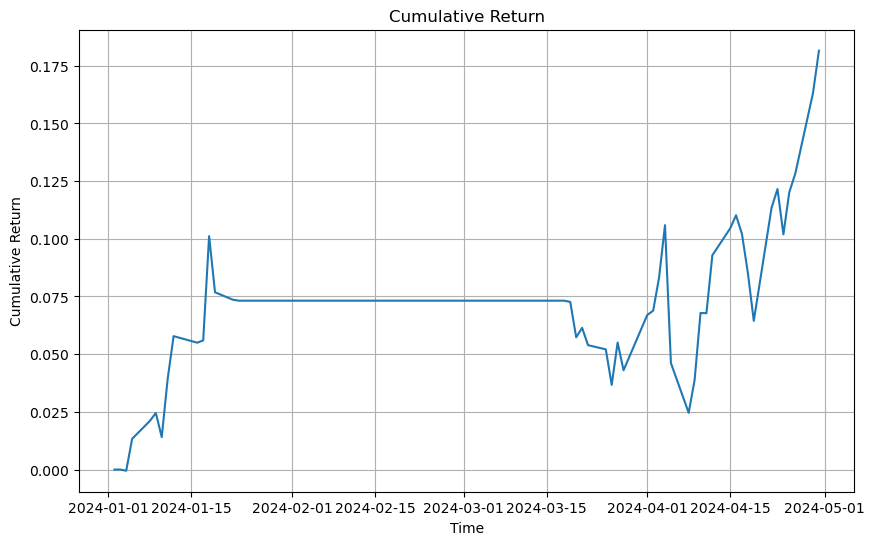

In [14]:
# Plot the cumulative return
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns['ADN_AEE'])
plt.title('Cumulative Return')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()